<a href="https://colab.research.google.com/github/Gabriel-17ope/Implementa-o-Analise_com_Knn/blob/main/AtividadeKnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
# Importando as bibliotecas
import pandas as pan
import seaborn as sea
import matplotlib.pyplot as mat
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
%matplotlib inline


In [24]:
#carregar e criar as funções
# Carregar os dados
dados = pan.read_csv('top_insta_influencers_data.csv')

# Função para converter colunas com sufixos 'k', 'm', 'b' e '%'
def converter_para_float(valor):
    if isinstance(valor, str):
        valor = valor.strip()
        if valor.endswith('k'):
            return float(valor[:-1]) * 1_000
        elif valor.endswith('m'):
            return float(valor[:-1]) * 1_000_000
        elif valor.endswith('b'):
            return float(valor[:-1]) * 1_000_000_000
        elif valor.endswith('%'):
            return float(valor[:-1]) / 100
    return float(valor) if valor else pan.NA

# Converter colunas específicas
colunas_para_converter = ['posts', 'followers', 'avg_likes', '60_day_eng_rate', 'new_post_avg_like', 'total_likes']
for col in colunas_para_converter:
    dados[col] = dados[col].apply(converter_para_float)

# Função para classificar países por continentes e atribuir números únicos dentro de faixas
def classificar_por_continente(pais):
    # América do Norte (10-19)
    # América do Norte (10-19)
    america_norte = {
        'United States': 10, 'Canada': 11, 'Mexico': 12
    }
    # América do Sul (1-9)
    america_sul = {
        'Brazil': 1, 'Argentina': 2, 'Chile': 3, 'Peru': 4, 'Colombia': 5, 'Venezuela': 6,
        'Ecuador': 7, 'Bolivia': 8, 'Paraguay': 9
    }
    # Europa (20-29)
    europa = {
        'France': 20, 'Germany': 21, 'Italy': 22, 'United Kingdom': 23, 'Spain': 24,
        'Netherlands': 25, 'Sweden': 26, 'Poland': 27, 'Belgium': 28, 'Portugal': 29
    }
    # Ásia (30-39)
    asia = {
        'China': 30, 'India': 31, 'Japan': 32, 'South Korea': 33, 'Indonesia': 34,
        'Pakistan': 35, 'Bangladesh': 36, 'Philippines': 37, 'Vietnam': 38, 'Turkey': 39
    }
    # África (40-49)
    africa = {
        'Nigeria': 40, 'Egypt': 41, 'South Africa': 42, 'Kenya': 43, 'Uganda': 44,
        'Sudan': 45, 'Morocco': 46, 'Angola': 47, 'Mozambique': 48, 'Ethiopia': 49
    }
    # Oceania (50-59)
    oceania = {
        'Australia': 50, 'New Zealand': 51
    }

    # Atribuindo números únicos dentro das faixas
    if pais in america_norte:
        return america_norte[pais]
    elif pais in america_sul:
        return america_sul[pais]
    elif pais in europa:
        return europa[pais]
    elif pais in asia:
        return asia[pais]
    elif pais in africa:
        return africa[pais]
    elif pais in oceania:
        return oceania[pais]
    else:
        return 0  # Para países que não estão na lista (outros)

# Aplicando a função à coluna 'country' para criar a coluna 'continente'
dados['continente'] = dados['country'].apply(classificar_por_continente)

# Verificando os resultados
print(dados[['country', 'continente']].head())


# Remover NaNs
dados = dados.dropna(subset=['followers', 'avg_likes', 'total_likes', '60_day_eng_rate'])


         country  continente
0          Spain          24
1  United States          10
2            NaN           0
3  United States          10
4  United States          10


In [ ]:
# Análises

# Análise exploratória: correlação entre variáveis numéricas
dados_numericos = dados.select_dtypes(include=[float, int])

# Gerar o heatmap de correlações
print('Mapa de calor')
mat.figure(figsize=(10, 8))
sea.heatmap(dados_numericos.corr(), annot=True, cmap='coolwarm')
mat.title("Mapa de Calor das Correlações")
mat.show()
print(' ')
# Distribuição de variáveis-chave
print('Distribuição de variáveis-chave')
colunas_para_distribuicao = ['60_day_eng_rate', 'avg_likes', 'new_post_avg_like', 'followers']
for coluna in colunas_para_distribuicao:
    mat.figure(figsize=(10, 8))
    sea.histplot(dados[coluna], kde=True)
    mat.title(f"Distribuição de {coluna}")
    mat.show()
    print(' ')

# Boxplots para destacar variáveis importantes
print('Boxplots para destacar variáveis importantes')
colunas_para_distribuicao = ['60_day_eng_rate', 'avg_likes', 'new_post_avg_like', 'followers']
for coluna in colunas_para_distribuicao:
    mat.figure(figsize=(10, 8))
    sea.boxplot(data=dados, x='continente', y=coluna)
    mat.title(f"Boxplot: {coluna} por Continente")
    mat.show()
    print(' ')
# Relação entre 'followers' e 'avg_likes'
print('Relação entre followers e avg_likes')
mat.figure(figsize=(10, 8))
sea.scatterplot(data=dados, x='followers', y='avg_likes')
mat.title("Relação entre Followers e Avg Likes")
mat.xlabel("Followers")
mat.ylabel("Avg Likes")
mat.show()
print(' ')
# Impacto de '60_day_eng_rate' na taxa de engajamento (representada por avg_likes/followers)
print('Impacto de 60 Day Engagement Rate na Taxa de Engajamento')
dados['engagement_rate'] = dados['avg_likes'] / dados['followers']
mat.figure(figsize=(10, 8))
sea.scatterplot(data=dados, x='60_day_eng_rate', y='engagement_rate')
mat.title("Impacto de 60 Day Engagement Rate na Taxa de Engajamento")
mat.xlabel("60 Day Engagement Rate")
mat.ylabel("Engagement Rate")
mat.show()
print(' ')
# Gráfico de barras comparando rank com influence_score
print('Gráfico de barras comparando rank com influence_score')
mat.figure(figsize=(10, 8))
sea.barplot(x='rank', y='influence_score', data=dados)
mat.title('Rank vs Influence Score')
mat.xlabel('Rank')
mat.ylabel('Influence Score')
mat.show()

In [ ]:
# Avaliação das correlações entre variáveis importantes
print("Correlação entre Followers e Avg Likes:", dados['followers'].corr(dados['avg_likes']))
print("Correlação entre Followers e 60 Day Engagement Rate:", dados['followers'].corr(dados['60_day_eng_rate']))
print("Correlação entre Total Likes e Influence Score:", dados['total_likes'].corr(dados['influence_score']))

# Avaliação de normalização para melhorar o desempenho
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Normalizando as variáveis numéricas mais importantes
dados_normalizados = dados[['followers', 'avg_likes', 'total_likes']]
dados_normalizados = scaler.fit_transform(dados_normalizados)

# Convertendo de volta para DataFrame para visualização
dados_normalizados = pan.DataFrame(dados_normalizados, columns=['followers', 'avg_likes', 'total_likes'])

# Visualizando a diferença de escala antes e depois da normalização
mat.figure(figsize=(10, 8))
sea.boxplot(data=dados_normalizados)
mat.title('Distribuição após Normalização')
mat.show()

In [ ]:
# Removendo valores NaN
dados = dados.dropna()

# Análise de variáveis com valores NaN
print("Número de NaNs por coluna antes de remover:", dados.isna().sum())

# Divisão de dados em variáveis independentes (X) e dependentes (y)
X = dados[['followers', 'avg_likes', '60_day_eng_rate', 'total_likes']]
y = dados['influence_score']

# Modelagem do kNN
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Inicializando o modelo kNN
knn = KNeighborsRegressor()

# Ajuste do modelo
knn.fit(X_train, y_train)

# Predições
y_pred = knn.predict(X_test)

# Avaliação do modelo
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

# Visualizando a comparação entre valores reais e preditos
mat.figure(figsize=(10, 8))
sea.scatterplot(x=y_test, y=y_pred)
mat.title('Valores Reais vs Preditos')
mat.xlabel('Valores Reais')
mat.ylabel('Valores Preditos')
mat.show()

# Otimização de Hiperparâmetros usando GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': [3, 5, 7, 9, 11], 'metric': ['euclidean', 'manhattan']}
grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print(f"Melhores parâmetros: {grid_search.best_params_}")
print(f"Melhor pontuação: {grid_search.best_score_}")


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


MAE com melhores parâmetros: 0.004383728848489551
MSE com melhores parâmetros: 6.523079955812854e-05
RMSE com melhores parâmetros: 0.008076558645743156


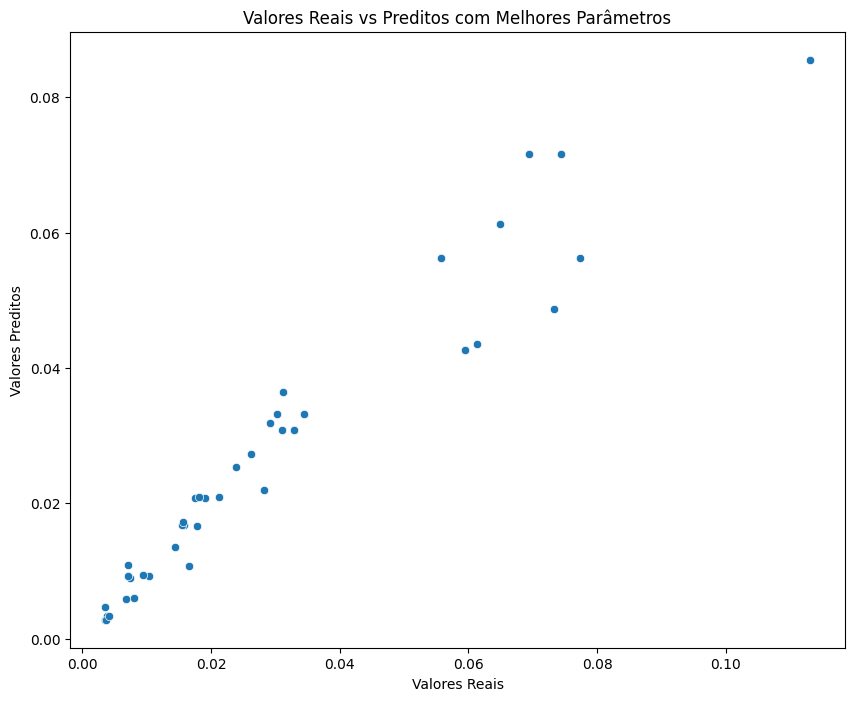

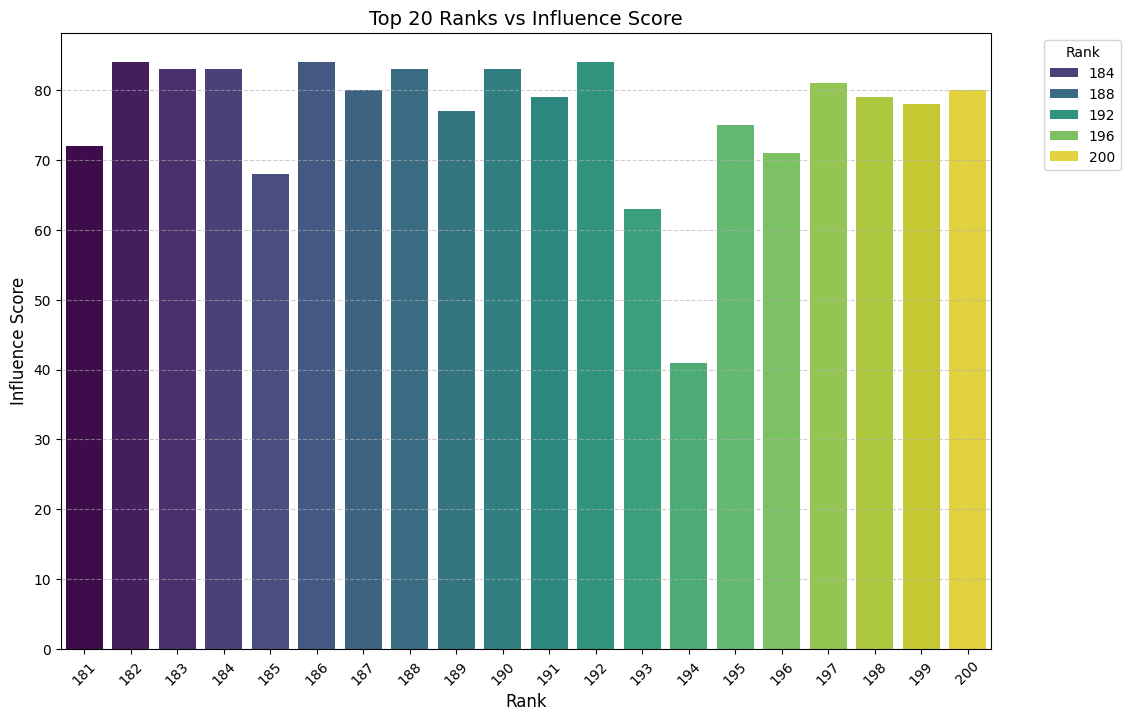

In [33]:
# Modelagem com os melhores parâmetros encontrados
best_knn = grid_search.best_estimator_
y_pred_best = best_knn.predict(X_test)

# Avaliação com os melhores parâmetros
mae_best = mean_absolute_error(y_test, y_pred_best)
mse_best = mean_squared_error(y_test, y_pred_best)
rmse_best = mean_squared_error(y_test, y_pred_best, squared=False)

print(f"MAE com melhores parâmetros: {mae_best}")
print(f"MSE com melhores parâmetros: {mse_best}")
print(f"RMSE com melhores parâmetros: {rmse_best}")

# Visualizando a comparação com os melhores parâmetros
mat.figure(figsize=(10, 8))
sea.scatterplot(x=y_test, y=y_pred_best)
mat.title('Valores Reais vs Preditos com Melhores Parâmetros')
mat.xlabel('Valores Reais')
mat.ylabel('Valores Preditos')
mat.show()

# Gráfico de barras comparando rank com influence_score
# Para visualização mais clara, utilizaremos apenas os top 20 ranks
top_ranks = dados.nlargest(20, 'rank')

mat.figure(figsize=(12, 8))
sea.barplot(
    data=top_ranks,
    x='rank',
    y='influence_score',
    hue='rank',  # Usar rank como hue para aplicar a paleta
    palette='viridis',
    dodge=False
)
print(' ')
mat.title("Top 20 Ranks vs Influence Score", fontsize=14)
mat.xlabel("Rank", fontsize=12)
mat.ylabel("Influence Score", fontsize=12)
mat.xticks(rotation=45)
mat.legend(title="Rank", bbox_to_anchor=(1.05, 1), loc='upper left')  # Ajustar a legenda
mat.grid(axis='y', linestyle='--', alpha=0.6)
mat.show()